<a href="https://colab.research.google.com/github/Yuumna/ECEN501-project-Breast-Cancer-Detection-/blob/master/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"yumnaali","key":"c1c730ac95b46295881495fbdd688b05"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
from zipfile import ZipFile
file_name= "breast-cancer-wisconsin-data.zip" 
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import pandas as pd
data=pd.read_csv('data.csv')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [0]:
# removing id and unnamed: 32 column which is not necessary for our model
data = data.drop(['id','Unnamed: 32'],axis = 1)

In [0]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
stand_scale = data.drop(['diagnosis'],axis = 1)
col_trans = make_column_transformer(
            (StandardScaler(), stand_scale.columns),
            remainder = 'passthrough')

In [0]:
from sklearn.model_selection import train_test_split
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
col_trans.fit_transform(X_train)

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

####SVC

In [0]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    pipe = make_pipeline(col_trans,svc_classifier)
    svc_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

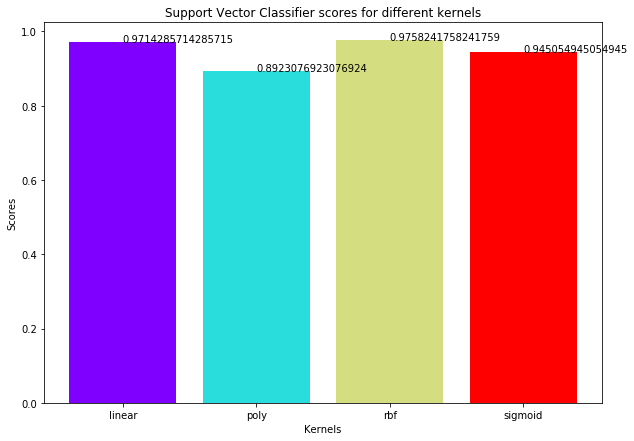

In [0]:
from matplotlib.cm import rainbow
import numpy as np
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [0]:
print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

Accuracy score on Train data: 97.58241758241759


In [0]:
import sklearn.metrics as metrics
svc_classifier = SVC(kernel = 'rbf')
pipe = make_pipeline(col_trans,svc_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test data: 96.49122807017544


In [0]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train, pipe.predict(X_train), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0    1  All
True                    
0          289    1  290
1            6  159  165
All        295  160  455


In [0]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted   0   1  All
True                  
0          65   2   67
1           2  45   47
All        67  47  114


In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision Score: {}'.format(precision_score(y_test,y_pred)));
print('Recall Score: {}'.format(recall_score(y_test,y_pred)))

Precision Score: 0.9574468085106383
Recall Score: 0.9574468085106383
